# MUSA 650 Homework 1: Basics of Machine Learning

In this assignment, you’ll explore fundamental machine learning concepts and techniques, with a focus on data preprocessing, image manipulation, and model evaluation. You are responsible for figuring out the code independently and may refer to tutorials, code examples, or use AI support, but **please cite all sources**.

Submit a single Jupyter Notebook containing code, narrative text, visualizations, and answers to each question. Open a pull request from your fork of this repository to the main repository for submission.

## Important Notes

- **Sample Size Considerations**: If experiments take too long with the complete dataset, start with a smaller sample for timely execution. For your final submission, use the full dataset if feasible, but if processing is still too intensive, note your sample sizes clearly. Sample size variations will not affect grading if documented appropriately.
- **Data Reshaping**: To switch between 2D and 1D representations, use functions like `numpy.flatten()` or `numpy.resize()` as needed.

## 1. Data Exploration

Load the mnist dataset using the following code, which contains all of the module imports needed for this assignment:

In [15]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 1.1 Dimensionality

**What is the type of the training and testing datasets?**

After loading the data from the code provided, I tried to understand the data structure. I found that the data is stored as a NumPy arrays image data. x_train and x_test are 3D arrays, while y_train and y_test are 1D arrays.
<br>
<br>
**How many features are in the training dataset? The testing dataset? How many samples are in each dataset?**

I use the .shape() function. The x_train and x_test data is in the (# images, image heigh, image width) format, with 6000 and 1000 images respectively in a 28x28 pixel size. The y_train and y_test data contains the number of images.

In [16]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


**If an array has a shape of `(100, 28, 28)`, what does each number represent in the context of image data (i.e., which number represents the number of images, and which represent the number of pixels?), and how would it change if you flattened it to a 2D array?**

As discussed earlier the x_train data has 6000 number of images, 28x28 pixel size and x_test data has 1000 images of the same pixel size. When the 3D array (x_train, x_test) is  flattened to a 2D array, the data format changes from  (images, height, width) to (images, flattened pixel values), where each column corresponds to a pixel value from the original image. The 28x28 grid is condensed into a single row of 784 elements.
<br>
<br>
**How would you convert a 3D array into a 2D array without changing the total number of elements? Describe how flatten() and reshape() can be used for this purpose.**

The .flatten() function creates a copy of the original array into a 1D array. The .reshape() function is used to convert a 3D array into a 2D array by multiplying the image height and width. The two functions can be used in tandem to create a copy and then rework the data.

In [17]:
# Flatten the training data
x_train_flattened = x_train.flatten()
x_test_flattened = x_test.flatten()

# Preview
print("x_train_flattened shape:", x_train_flattened.shape)
print("x_test_flattened shape:", x_test_flattened.shape)

# Reshape the flattened data
x_train_reshaped = x_train_flattened.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test_flattened.reshape(x_test.shape[0], -1)

# Preview
print("x_train_reshaped shape:", x_train_reshaped.shape)
print("x_test_reshaped shape:", x_test_reshaped.shape)

x_train_flattened shape: (47040000,)
x_test_flattened shape: (7840000,)
x_train_reshaped shape: (60000, 784)
x_test_reshaped shape: (10000, 784)


**Explain why it’s necessary to reshape data when transitioning from raw images to model input, particularly in neural networks. What are the implications of reshaping an image array into a vector (1D array) for each sample? (Feel free to turn to Google for this, as long as you cite your sources.)**

The neural network's architecture mandates that the data is formatted in a way that the network can understand and use for training. As one would expect, reshaping the data into a 1D array removes the spatial information and increases the number of features to be processed (as seen above). ID array or flattened images might work well for CNN but would be unusable for some other network [source](https://medium.com/@jwbtmf/reshaping-the-dataset-for-neural-network-15ee7bcea25e#:~:text=If%20the%20input%20data%20does,understand%20and%20use%20for%20training.).

### 1.2 Visualization

**Select one random example from each category in the testing set, display each 2D image, and label it with the corresponding category name.**

We first look at the number of unique categories in the dataset. y_test contains the labels or target variables for the testing dataset and represents the digit (0-9) that each image in x_test_reshaped. For each unique category 0-9, we loop using y_test to select a random image from x_test_reshaped. The images are then saved in category and plotted. As we know from a little google search, MNIST data consists of handwritten digits from 0 to 9.

In [18]:
# Identify number of categories in y_test
unique_labels = np.unique(y_test)
print(unique_labels)

[0 1 2 3 4 5 6 7 8 9]


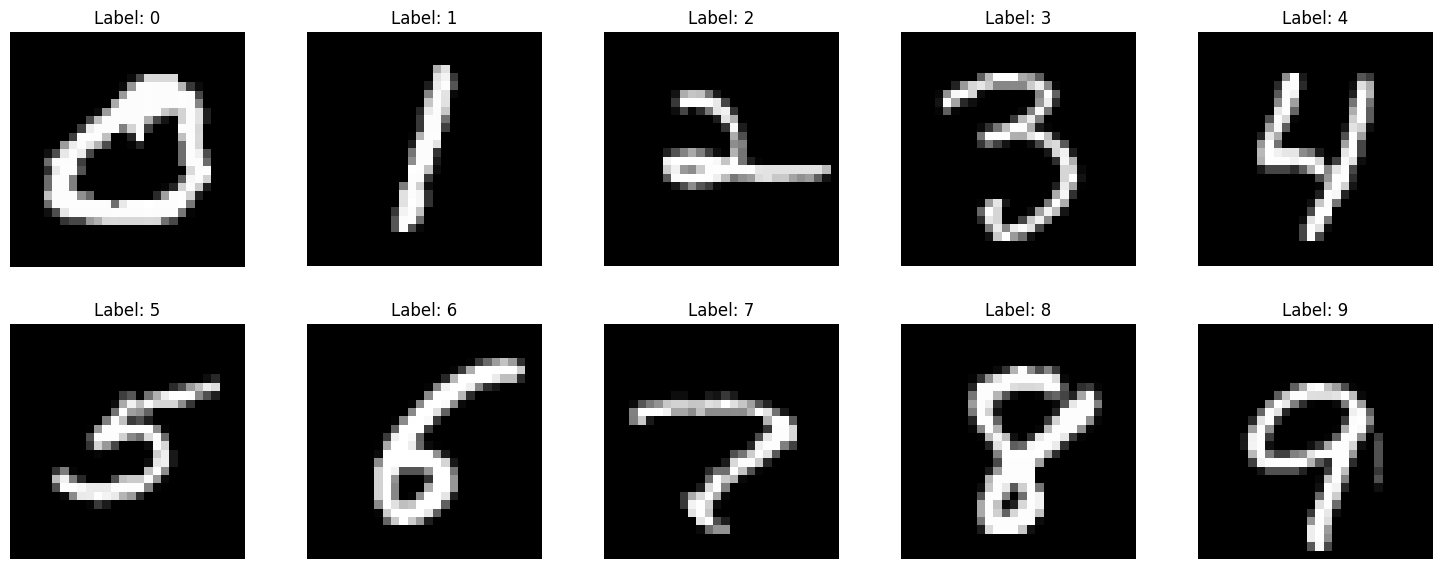

In [19]:
# Create a dictionary to store one random image per category
images_per_category = {}

# Loop through unique categories
for category in np.unique(y_test):
    indices = np.where(y_test == category)[0]
    random_index = np.random.choice(indices)
    images_per_category[category] = (x_test_reshaped[random_index], category)

# Plot the images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.tight_layout()

# Loop through the dictionary and display the images
for i, (category, (image, label)) in enumerate(images_per_category.items()):
    row = i // 5
    col = i % 5

    # Reshape the image back to 28x28 for display
    image = image.reshape(28, 28)
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f"Label: {label}")
    axes[row, col].axis('off')
plt.show()

## 2. Data Processing

### 2.1 Subsetting

**Create a 10% random subset of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?**

**Now subset the *first* 10% of each training and testing set. What is the distribution of each label in the initial train data? What is the distribution of each label in the reduced train data?**

**When reducing dataset size, what differences might you expect to see in results between randomly selecting samples versus selecting the first portion of the dataset? Is this borne out by the subsets you just created? How does the distribution of the labels in the various subsampled datasets compare to the distribution of the full datasets?**

**Why might subsampling a dataset be beneficial when developing machine learning models? Discuss the trade-offs.**

 We subset from the original x_train and x_test dataset as it's more consistent and organized to sybset before reshaping to ensure that you are working with a representative subset of the original images. Based on our code, randomly selectly 10% of training data tends to maintain the distribution better than selecting 10% of the first portion. While subsampling can reduce processing time, if the data is not randomly selected, it might introduce bias. In some cases, the data might have a few outliers in some categories towards one end. In such cases, if we want to exclude the outliers, it might be better to take a portion of the sample rather than a random sample. For the same reason or if the data is not equally distributed across all categories, it might be better to take a sub-sample instead of the full sample.

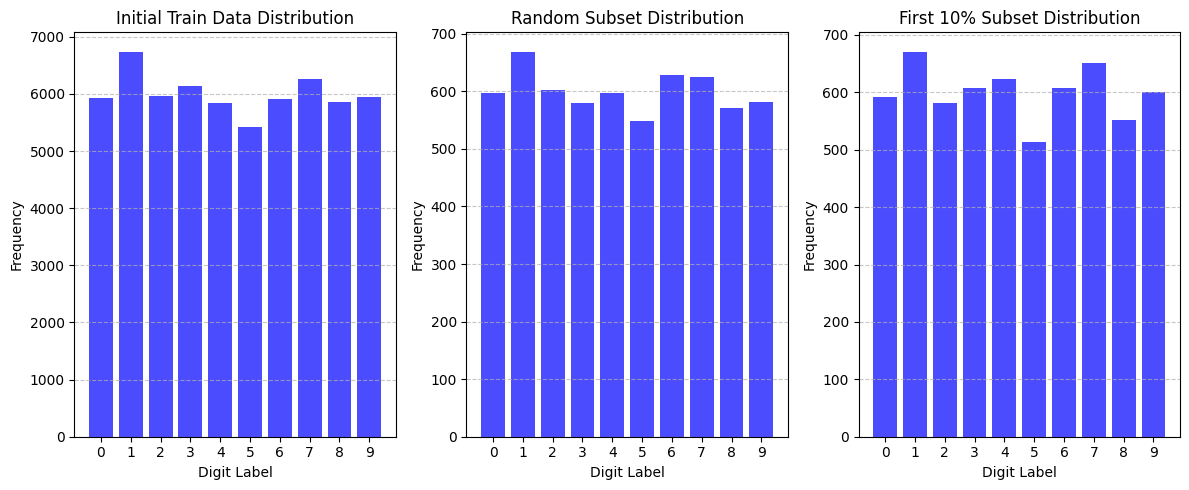

In [20]:
# Randomly select 10% of the training data
num_train_samples = int(0.1 * len(x_train))
train_indices = np.random.choice(len(x_train), size=num_train_samples, replace=False)
x_train_subset_random = x_train[train_indices]
y_train_subset_random = y_train[train_indices]

# Randomly select 10% of the testing data
num_test_samples = int(0.1 * len(x_test))
test_indices = np.random.choice(len(x_test), size=num_test_samples, replace=False)
x_test_subset_random = x_test[test_indices]
y_test_subset_random = y_test[test_indices]

# Select the first 10% of the training data
x_train_subset_first = x_train[:int(0.1 * len(x_train))]
y_train_subset_first = y_train[:int(0.1 * len(y_train))]

# Select the first 10% of the testing data
x_test_subset_first = x_test[:int(0.1 * len(x_test))]
y_test_subset_first = y_test[:int(0.1 * len(y_test))]

from collections import Counter

# initial train data
initial_train_distribution = Counter(y_train)

# random 10% subset train data
random_subset_distribution = Counter(y_train_subset_random)

# first 10% subset train data
first_subset_distribution = Counter(y_train_subset_first)

# plot distribution
def plot_distribution(distribution, title, ax):
    labels, values = zip(*sorted(distribution.items()))
    ax.bar(labels, values, color='blue', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Digit Label')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(10))
    ax.set_xticklabels(labels)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Create subplots for the distributions
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
plot_distribution(initial_train_distribution, 'Initial Train Data Distribution', axes[0])
plot_distribution(random_subset_distribution, 'Random Subset Distribution', axes[1])
plot_distribution(first_subset_distribution, 'First 10% Subset Distribution', axes[2])
plt.tight_layout()
plt.show()

### 2.2 Feature Engineering

**What are the features versus the output in this assignment? Why is it important to distinguish between features (inputs) and outputs (labels) in a machine learning model?**

The input features are pixel values for the images while the output is the image of a digit. Model inputs are used to map out and predict the output. Without a clear separation of features and outputs, the model wouldn't know what to predict or how to evaluate its performance.
<br>
<br>
**Select all train images labeled "3". Create a single, pixel-wise average image of all of these images. Plot the 2D mean and standard deviation images for category 3 in both the training and testing sets. Comment on the differences between the mean and standard deviation images between the training and testing datasets. Plot the 2D mean and standard deviation images for category "3" in the training and testing sets for the binarized images.Now repeat this for a new label (e.g., "7"). Comment on the differences between the mean and standard deviation images between the training and testing datasets for the binarized images.**

Based on the images shown below, we see that the average image from the training set is legible but slightly hazy. However, the mean image from both the training and testing set is much clearer than the std dev images. The blurry grayscale digits represent the average pixel intensity of the sampled data. Darker areas indicate consistently high pixel intensity across samples.
In both the cases, the training set images in less hazy than the testing set. This could be attributed to the larger sample size. Similar observations can be made for the plots of the digit 7. In all the cases, while the binarized images differ slightly from the non-binarized ones, it is quite difficult to the tell the two apart with the naked eye.


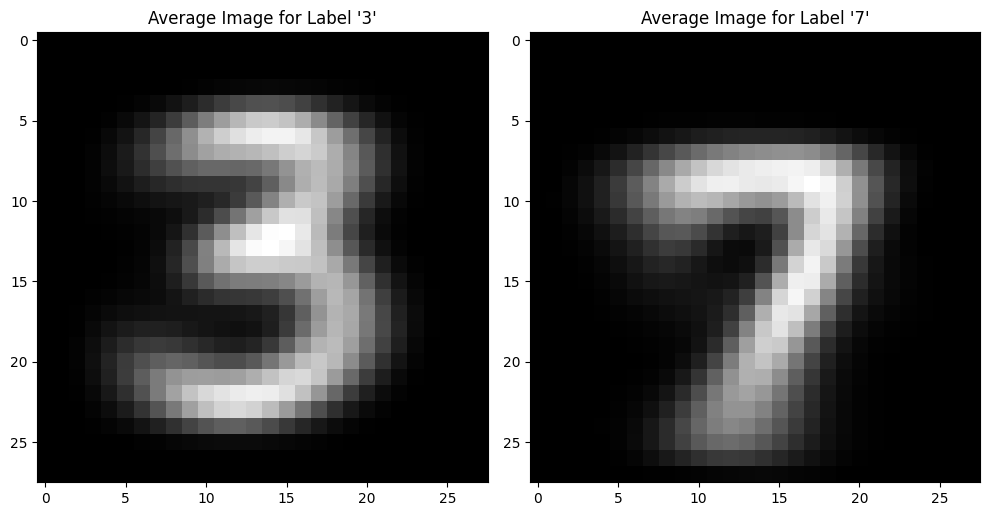

In [21]:
# Select images labeled "3" and "7" from the training set
images_label_3 = x_train[y_train == 3]
average_image_3 = np.mean(images_label_3, axis=0)
images_label_7 = x_train[y_train == 7]
average_image_7 = np.mean(images_label_7, axis=0)

# Plot the average image of 3 and 7
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(average_image_3, cmap='gray')
axes[0].set_title("Average Image for Label '3'")
axes[1].imshow(average_image_7, cmap='gray')
axes[1].set_title("Average Image for Label '7'")
plt.tight_layout()
plt.show()

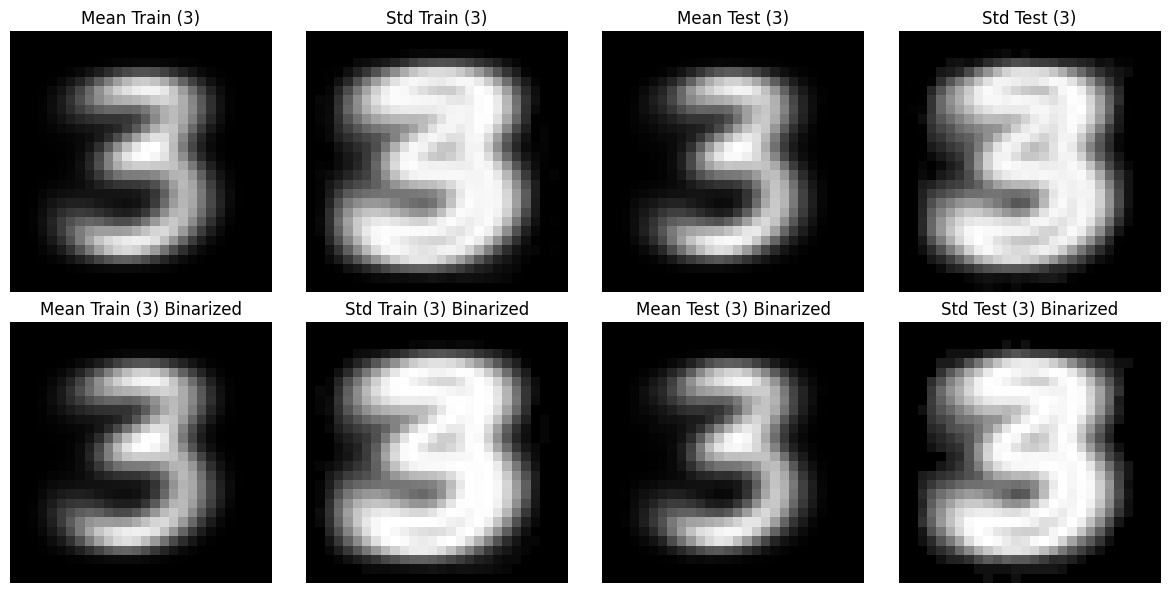

In [22]:
def compute_stats(images):
    mean, std = np.mean(images, axis=0), np.std(images, axis=0)
    binary = (images >= 128).astype(int)
    mean_bin, std_bin = np.mean(binary, axis=0), np.std(binary, axis=0)
    return mean, std, mean_bin, std_bin

# Select all training and testing images labeled "3"
train_images_3 = x_train[y_train == 3]
test_images_3 = x_test[y_test == 3]

# Compute stats for training and test sets
mean_train_3, std_train_3, mean_train_3_bin, std_train_3_bin = compute_stats(train_images_3)
mean_test_3, std_test_3, mean_test_3_bin, std_test_3_bin = compute_stats(test_images_3)

# Plot results
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
titles = ["Mean Train (3)", "Std Train (3)", "Mean Test (3)", "Std Test (3)",
          "Mean Train (3) Binarized", "Std Train (3) Binarized",
          "Mean Test (3) Binarized", "Std Test (3) Binarized"]
images = [mean_train_3, std_train_3, mean_test_3, std_test_3,
          mean_train_3_bin, std_train_3_bin, mean_test_3_bin, std_test_3_bin]

for ax, img, title in zip(axes.flat, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

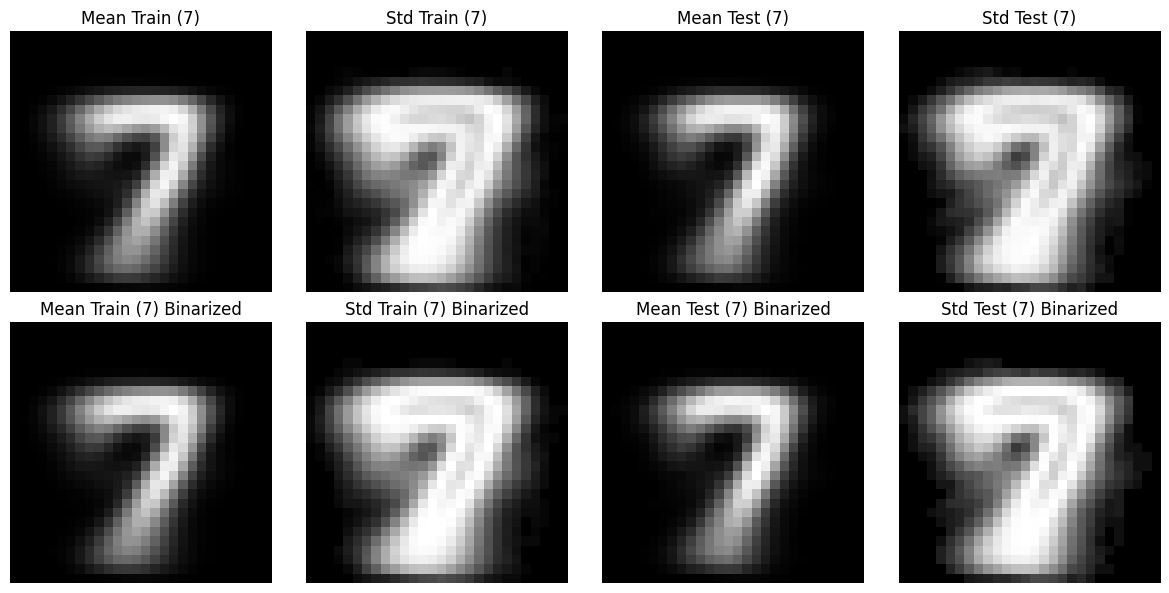

In [23]:
# Select all training and testing images labeled "7"
train_images_7 = x_train[y_train == 7]
test_images_7 = x_test[y_test == 7]

# Compute stats for training and test sets for digit 7
mean_train_7, std_train_7, mean_train_7_bin, std_train_7_bin = compute_stats(train_images_7)
mean_test_7, std_test_7, mean_test_7_bin, std_test_7_bin = compute_stats(test_images_7)

# Plot results for digit 7
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
titles = ["Mean Train (7)", "Std Train (7)", "Mean Test (7)", "Std Test (7)",
          "Mean Train (7) Binarized", "Std Train (7) Binarized",
          "Mean Test (7) Binarized", "Std Test (7) Binarized"]
images = [mean_train_7, std_train_7, mean_test_7, std_test_7,
          mean_train_7_bin, std_train_7_bin, mean_test_7_bin, std_test_7_bin]

for ax, img, title in zip(axes.flat, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


## Binarization

**Binarize both of the images from the previous question by setting pixel values equal to 1 if they are greater than the mean value for that pixel and equal to 0 if they are less than the mean value for that pixel.**

**In plain English, what are we actually *doing* when we binarize an image? How does the new pixel value relate to the pixel value of the original image and the mean value for that pixel across all images with that label?**

Binarization compares each pixel of the image to the mean image. If the pixel value is greater than the mean value, it becomes 1, otherwise 0. Firstly, for both the original images and the binarized images, the Euclidean distance is calculated between each image and the mean image. Then the most dissimilar and similar images are found by identifying the maximum and minimum distances, respectively. Binarizing an image using the mean as a threshold converts it into a high-contrast. Based on the output, we see that the original image produced for most similar and dissimilar is much more grainy than the binarized ones. The binarized image is a lot sharper in contrast. While binarization reduces noise, however, unlike what I expected, the most similar binarized image is a lot more chunky. Based on the binarized image for the most similar, it seems there are several points in the image that are greater than the mean value while for the most dissimilar, its the opposite. Regions with consistently high values across all images are binarized as 1, preserving the common shape of the digit whereas less consistent or lower-value areas will be binarized as 0, effectively removing less significant pixel variations. This helps highlight the most defining features of each digit while reducing noise.

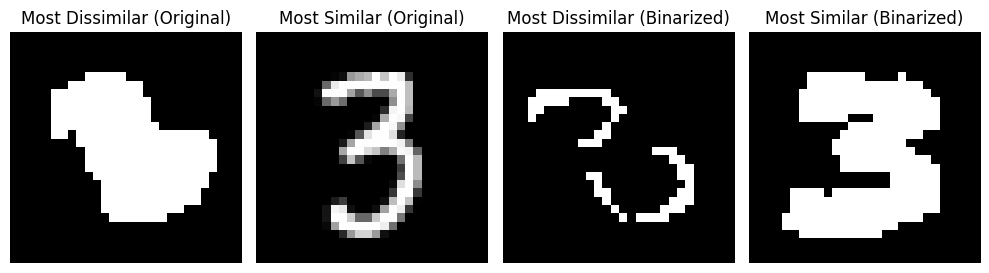

In [34]:
from scipy.spatial.distance import cdist

def find_similar_dissimilar(images, mean_image):
    distances = cdist(images.reshape(images.shape[0], -1),
                      mean_image.reshape(1, -1),
                      metric='euclidean')
    most_dissimilar_index = np.argmax(distances)
    most_similar_index = np.argmin(distances)
    return most_dissimilar_index, most_similar_index

# Calculate the mean image for category "3" in the training set
mean_train_3 = np.mean(x_train[y_train == 3], axis=0)

# Binarize the training images for category "3" using np.where
binarized_train_3 = np.where(x_train[y_train == 3] > mean_train_3, 1, 0)

# Find most similar and dissimilar images (original)
most_dissimilar_index, most_similar_index = find_similar_dissimilar(train_images_3, mean_train_3)

# Find most similar and dissimilar images (binarized)
most_dissimilar_index_bin, most_similar_index_bin = find_similar_dissimilar(binarized_train_3, mean_train_3)

# Plot results
fig, axes = plt.subplots(1, 4, figsize=(10, 10))
titles = ["Most Dissimilar (Original)", "Most Similar (Original)",
          "Most Dissimilar (Binarized)", "Most Similar (Binarized)"]
images = [train_images_3[most_dissimilar_index], train_images_3[most_similar_index],
          binarized_train_3[most_dissimilar_index_bin], binarized_train_3[most_similar_index_bin]]

for ax, img, title in zip(axes.flat, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

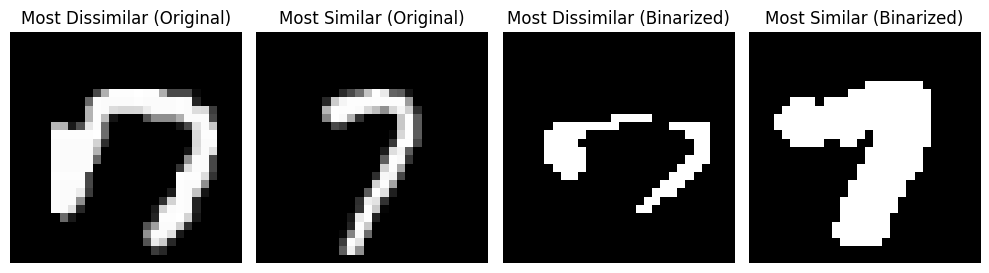

In [35]:
# Calculate the mean image for category "7" in the training set
mean_train_7 = np.mean(train_images_7, axis=0)

# Binarize the training images for category "7" using np.where
binarized_train_7 = np.where(train_images_7 > mean_train_7, 1, 0)

# Find most similar and dissimilar images (original)
most_dissimilar_index, most_similar_index = find_similar_dissimilar(train_images_7, mean_train_7)

# Find most similar and dissimilar images (binarized)
most_dissimilar_index_bin, most_similar_index_bin = find_similar_dissimilar(binarized_train_7, mean_train_7)

# Plot results
fig, axes = plt.subplots(1, 4, figsize=(10, 10))
titles = ["Most Dissimilar (Original)", "Most Similar (Original)",
          "Most Dissimilar (Binarized)", "Most Similar (Binarized)"]
images = [train_images_7[most_dissimilar_index], train_images_7[most_similar_index],
          binarized_train_7[most_dissimilar_index_bin], binarized_train_7[most_similar_index_bin]]

for ax, img, title in zip(axes.flat, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


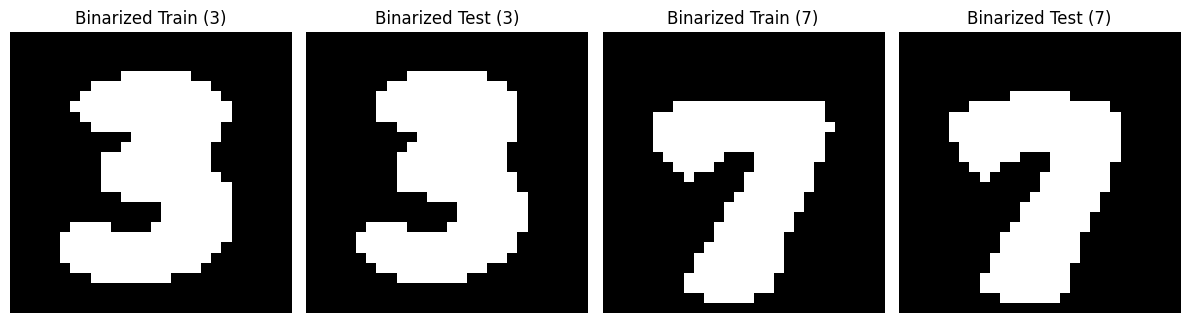

In [25]:
# Binarize images based on their mean values
binarized_train_3 = (mean_train_3 >= mean_train_3.mean()).astype(int)
binarized_test_3 = (mean_test_3 >= mean_test_3.mean()).astype(int)
binarized_train_7 = (mean_train_7 >= mean_train_7.mean()).astype(int)
binarized_test_7 = (mean_test_7 >= mean_test_7.mean()).astype(int)

# Plot results
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
titles = ["Binarized Train (3)", "Binarized Test (3)",
          "Binarized Train (7)", "Binarized Test (7)"]
images = [binarized_train_3, binarized_test_3, binarized_train_7, binarized_test_7]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


**What is the index of the most *dissimilar* image in category "3" in the training set for the regular images? What about the most *similar* image? Does this change for the binarized images? If so, why? Make sure to plot all four images with approproate labels.**

**What do you think the effect of binarizing these images is from a machine learning perspective? How does binarization of images (converting pixel values to 0 or 1 based on a threshold) affect the representation of features, and what might be the benefits and limitations of this approach?**

for the most similar and dissimilar images for digit 3, the Most Dissimilar (Binarized) has the highest deviation from the average image of 3 while the most similar (original) had the least. This index shows that images which were previously considered dissimilar in their grayscale form become more similar in their binary form if they share the same essential shape and structure. Images that were previously similar CAN become more dissimilar if their binarized forms highlight differences that were not as apparent in their original grayscale versions. This illustrates the impact of feature engineering and data preprocessing on the way machine learning models perceive and interpret data.

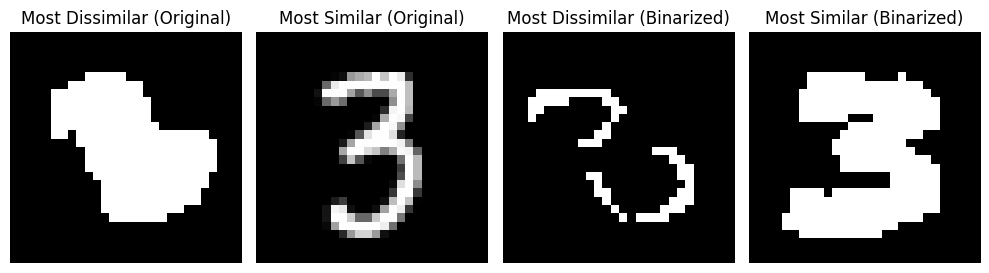

Most dissimilar image index (original): 1729
Most similar image index (original): 926
Most dissimilar image index (binarized): 5715
Most similar image index (binarized): 1399


In [36]:
def find_similar_dissimilar(images, mean_image):
    """
    Finds the most similar and dissimilar images to the mean image.

    Args:
        images: A NumPy array of images.
        mean_image: The mean image.

    Returns:
        A tuple containing the indices of the most dissimilar and similar images.
    """
    distances = cdist(images.reshape(images.shape[0], -1),
                      mean_image.reshape(1, -1),
                      metric='euclidean')
    most_dissimilar_index = np.argmax(distances)
    most_similar_index = np.argmin(distances)
    return most_dissimilar_index, most_similar_index

# Select all training images labeled "3"
train_images_3 = x_train[y_train == 3]

# Calculate the mean image for category "3" in the training set
mean_train_3 = np.mean(train_images_3, axis=0)

# Binarize the training images for category "3"
binarized_train_3 = np.where(train_images_3 > mean_train_3, 1, 0)

# Find most similar and dissimilar images (original)
most_dissimilar_index, most_similar_index = find_similar_dissimilar(train_images_3, mean_train_3)

# Find most similar and dissimilar images (binarized)
most_dissimilar_index_bin, most_similar_index_bin = find_similar_dissimilar(binarized_train_3, mean_train_3)

# Plot results
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
titles = ["Most Dissimilar (Original)", "Most Similar (Original)",
          "Most Dissimilar (Binarized)", "Most Similar (Binarized)"]
images = [train_images_3[most_dissimilar_index], train_images_3[most_similar_index],
          binarized_train_3[most_dissimilar_index_bin], binarized_train_3[most_similar_index_bin]]

for ax, img, title in zip(axes.flat, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

print(f"Most dissimilar image index (original): {most_dissimilar_index}")
print(f"Most similar image index (original): {most_similar_index}")
print(f"Most dissimilar image index (binarized): {most_dissimilar_index_bin}")
print(f"Most similar image index (binarized): {most_similar_index_bin}")

**How does what you've just done relate to the idea of standardizing data? Why might it be important to standardize our data before using it to train a model?**

Binarization can transforms the feature space as instead of representing features as continuous pixel intensities, they are now represented as binary values. This can simplify the model's learning process, as it has to deal with fewer possible feature values. It also creates more abrupt changes in pixel values, which corresponds to the boundaries of objects. By discarding subtle variations in pixel values, binarization helps reduce noise that might hinder model performance. Binarization can lead to improved model generalization by focusing on the most essential features and reducing the influence of noise. This can create a simpler, more linear model.
<br>
<br>

**Describe how calculating a pixel-wise mean or standard deviation for a set of images can help you understand variations within a category. What does a high standard deviation indicate in this context?**

A pixel-wise mean represents the average intensity value for each pixel across all images or the "average image" for that digit. It provides a visual representation of the common features shared by images.
Pixel-Wise Standard Deviation represents the spread of pixel intensity values at each pixel location across all images. It measures how much the individual pixel values deviate from the mean value at that location. The standard deviation image highlights inconsistency. A high standard deviation at a particular pixel location could indicate that the pixel values at that location vary significantly across different images. This information can be helpful for feature selection and interpreting model.

## 3. Model Training, Validation, and Intepretation

### 3.1 Support Vector Machine

**From the training dataset, select only images from categories "3" and "9".Subdivide the data into Set1 and Set2, with 60% of the data in Set1 and 40% in Set2. Replace category labels with 0 for 3 and 1 for 9. Use Set1 to train a linear support vector machine classifier with default parameters and predict the class labels for Set2. What is the prediction accuracy using the model trained on the training set? What is the prediction accuracy using the model trained on the testing set?**

I kept only the training data foe digits 3 and 9 and split it into set 1 and set2. Then I ran an SVM classifier on set 1 and made prediction on set2. From the SVM model, the Prediction accuracy on Set2 is 0.97, which is quite high.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Select images labeled "3" and "9" from the training set
indices_3 = np.where(y_train == 3)[0]
indices_9 = np.where(y_train == 9)[0]
combined_indices = np.concatenate((indices_3, indices_9))
x_combined = x_train[combined_indices]
y_combined = y_train[combined_indices]
x_combined = x_combined.reshape(x_combined.shape[0], -1)

# Replace labels with 0 for 3 and 1 for 9
y_combined = np.where(y_combined == 3, 0, 1)

# Subdivide the data into Set1 and Set2
x_set1, x_set2, y_set1, y_set2 = train_test_split(x_combined, y_combined, test_size=0.4, random_state=42)

# Train a linear SVM classifier on Set1
svm_classifier = LinearSVC()
svm_classifier.fit(x_set1, y_set1)

# Predict class labels for Set2 using the trained model
y_pred_set2 = svm_classifier.predict(x_set2)

# Calculate the prediction accuracy on Set2
accuracy_set2 = accuracy_score(y_set2, y_pred_set2)
print("Prediction accuracy on Set2:", accuracy_set2)

# Predict class labels for Set1 using the trained model (for comparison)
y_pred_set1 = svm_classifier.predict(x_set1)

# Calculate the prediction accuracy on Set1
accuracy_set1 = accuracy_score(y_set1, y_pred_set1)
print("Prediction accuracy on Set1:", accuracy_set1)


Prediction accuracy on Set2: 0.9755794701986755
Prediction accuracy on Set1: 1.0


### 3.2 Modeling with Engineered Data

We describe each image by using a reduced set of features (compared to n = 784 initial features for each pixel value) as follows:

- Binarize the image by setting the pixel values to 1 if they are greater than 128 and 0 otherwise.
- For each image row i, find n_i, the sum of 1's in the row (28 features).
- For each image column j, find n_j, the sum of 1's in the column (28 features).
- Concatenate these features to form a feature vector of 56 features.

What is the prediction accuracy using an SVM model trained on the training set? What is the prediction accuracy using an SVM model trained on the testing set? How about the prediction accuracy of a KNN model trained on the training set? And on the testing set? What does this tell you about the potential impacts of feature engineering?

In [40]:
def engineer_features(images):
    # Reshape images back to 28x28
    images = images.reshape(-1, 28, 28)  # -1 infers the number of images

    binarized_images = (images > 128).astype(int)
    row_sums = np.sum(binarized_images, axis=1)
    col_sums = np.sum(binarized_images, axis=2)  # Now operates on the correct axis
    engineered_features = np.concatenate((row_sums, col_sums), axis=1)
    return engineered_features

# Feature Engineering
x_combined_engineered = engineer_features(x_combined)

# Split data
x_train_eng, x_test_eng, y_train_eng, y_test_eng = train_test_split(
    x_combined_engineered, y_combined, test_size=0.4, random_state=42)

# SVM Model
svm_classifier = LinearSVC()
svm_classifier.fit(x_train_eng, y_train_eng)

svm_train_acc = accuracy_score(y_train_eng, svm_classifier.predict(x_train_eng))
svm_test_acc = accuracy_score(y_test_eng, svm_classifier.predict(x_test_eng))
print(f"SVM Train Accuracy: {svm_train_acc}")
print(f"SVM Test Accuracy: {svm_test_acc}")


# KNN Model
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train_eng, y_train_eng)

knn_train_acc = accuracy_score(y_train_eng, knn_classifier.predict(x_train_eng))
knn_test_acc = accuracy_score(y_test_eng, knn_classifier.predict(x_test_eng))

print(f"KNN Train Accuracy: {knn_train_acc}")
print(f"KNN Test Accuracy: {knn_test_acc}")


SVM Train Accuracy: 0.9663355408388521
SVM Test Accuracy: 0.9635761589403974
KNN Train Accuracy: 0.9795805739514348
KNN Test Accuracy: 0.9685430463576159


We run the SVM classifier on the training and testing set, both come out with an accuracy of 0.96. Whereas for the KNN model, the training and testing set accuracy is 0.979 and 0.968 respectively. The difference in accuracy is due to the differences in how the two models perform the operation. The SVM model creates a hyperplane to separate classes whereas the KNN model creates a decision boundary based on its nearest neighbors. The former is less sensitive to outliers whereas the latter is highly sensitive which can skew the selection. The KNN model achieves slightly higher accuracy on the training set and the testing set than SVM model.

### 3.3 K-Nearest Neighbors

**In the training and testing datasets, select images in the categories 1, 3, 5, 7, and 9. Train a k-NN classifier using 4 to 40 nearest neighbors, with a step size of 4.For k = 4, what is the label that was predicted with lowest accuracy? For k = 20, what is the label that was predicted with lowest accuracy? What is the label pair that was confused most often (i.e., class A is labeled as B, and vice versa)?**



In [43]:
import pandas as pd

# Select images in categories 1, 3, 5, 7, and 9
selected_categories = [1, 3, 5, 7, 9]
train_indices = np.isin(y_train, selected_categories)
test_indices = np.isin(y_test, selected_categories)

x_train_selected = x_train[train_indices]
y_train_selected = y_train[train_indices]
x_test_selected = x_test[test_indices]
y_test_selected = y_test[test_indices]

# Reshape the data
x_train_selected = x_train_selected.reshape(x_train_selected.shape[0], -1)
x_test_selected = x_test_selected.reshape(x_test_selected.shape[0], -1)

# Train k-NN classifier
k_values = range(4, 41, 4)
accuracies = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train_selected, y_train_selected)
    y_pred = knn_classifier.predict(x_test_selected)
    accuracy = accuracy_score(y_test_selected, y_pred)
    accuracies.append(accuracy)

#Analyze Results at:
k=4
knn_classifier_4 = KNeighborsClassifier(n_neighbors=k)
knn_classifier_4.fit(x_train_selected, y_train_selected)
y_pred_4 = knn_classifier_4.predict(x_test_selected)

#Confusion Matrix for k=4
confusion_matrix_4 = pd.crosstab(y_test_selected, y_pred_4, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix for k=4:\n",confusion_matrix_4)

Confusion Matrix for k=4:
 Predicted     1    3    5    7    9
Actual                             
1          1134    1    0    0    0
3             2  984   12    9    3
5             0   19  870    2    1
7            25    0    0  995    8
9             6   10    5   15  973


We set the KNN feature in the range 4 to 40 for the selected digits 1, 3, 5, 7 and 9. For the confusion matrix at K=4, the rows represent the actual labels and the column the predicted labels by our ML algorithm. The model predicts with the following accuracy for each digit:
*   Digit 1: 99.91%
*   Digit 3: 97.43%
*   Digit 5: 97.53%
*   Digit 7: 96.79%
*   Digit 9: 96.43%

In [44]:
#Analyze Results at:
k=20
knn_classifier_20 = KNeighborsClassifier(n_neighbors=k)
knn_classifier_20.fit(x_train_selected, y_train_selected)
y_pred_20 = knn_classifier_20.predict(x_test_selected)

#Confusion Matrix for k=20
confusion_matrix_20 = pd.crosstab(y_test_selected, y_pred_20, rownames=['Actual'], colnames=['Predicted'])
print("Confusion Matrix for k=20:\n",confusion_matrix_20)

Confusion Matrix for k=20:
 Predicted     1    3    5    7    9
Actual                             
1          1133    2    0    0    0
3             3  984   10   10    3
5             1   11  873    2    5
7            29    0    0  984   15
9             6   11    6   11  975


Similarly, For the confusion matrix at K=20, the model predicts with the following accuracy for each digit:
*   Digit 1: 99.82%
*   Digit 3: 97.14%
*   Digit 5: 97.35%
*   Digit 7: 96.74%
*   Digit 9: 96.34%

In both instances, the digit 9 had the highest rate of misclassification, whereas digit 1 had the lowest. In both instances, digit 7 had some confusion with '1' and a few with '9'. The digit 9 was also similarly confused for 7 and 3.








**Visualize 5 mislabeled samples with their actual and predicted labels. Based on the patterns in the pixel values for each category, which labels (numbers) do you think the model might struggle to identify or distinguish from one another? Explain why certain labels might be more challenging to separate, considering the similarity in pixel patterns or shape.**

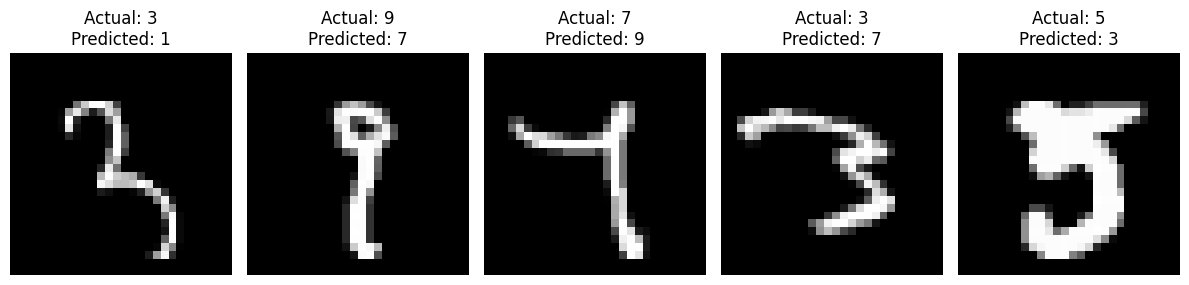

In [45]:
#Find Misclassified Images
misclassified_indices = np.where(y_test_selected != y_pred_4)[0]
num_misclassified_to_show = 5
fig, axes = plt.subplots(1, num_misclassified_to_show, figsize=(12, 4))

for i in range(num_misclassified_to_show):
    index = misclassified_indices[i]
    axes[i].imshow(x_test_selected[index].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Actual: {y_test_selected[index]}\nPredicted: {y_pred_4[index]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

Based on the confusion matrix and the images of the 5 mislabelled digits, the confusion is most likely to occur between 1-7, 7-9 and 3-5 pairs. This is likely due to the variation is writing style and the structural similarity between the numbers. For instance, 3 and 5 have similar curves, while 1 and 7 differ marginally at the top.

### 3.4 Comprehension Questions

**Why is it important to have separate training and testing datasets? What potential issues arise if you use the same data for both training and evaluation?**

We separate the data into training and testing datasets to evaluate the model's ability to generalize. Training Data is used to teach the model patterns and relationships within the data to make accurate predictions while testing data is used only for evaluating the model's performance in a real-world scenario with new data. If we use the same data for both training and evaluation, we run the risk of overfitting and fail to generalize.
<br>
<br>

**If you achieve a high accuracy on the training set but a lower accuracy on the testing set, what might this indicate about your model’s performance and generalization?**

If we achieve a high accuracy on the training set but a lower accuracy on the testing set, it's a strong indicator for overfitting.This means the model won't be able to make accurate predictions and the model's predictions might be inconsistent.
